In [10]:
# Step 1: Import required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [14]:
# Step 2: Load the pretrained YOLOv8 model (nano version for speed)
# This auto-downloads weights from Ultralytics Hub
model = YOLO("yolov8n.pt")
print("✅ YOLOv8 model loaded successfully!")


✅ YOLOv8 model loaded successfully!


In [15]:
# Step 3: Run object detection on a sample image
img_path = "https://ultralytics.com/images/bus.jpg"
results = model(img_path)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\Anand\Deep Learning\Lab Experiments\EX 8 - OBJECT DETECTION WITH YOLO3\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 79.9ms
Speed: 2.4ms preprocess, 79.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


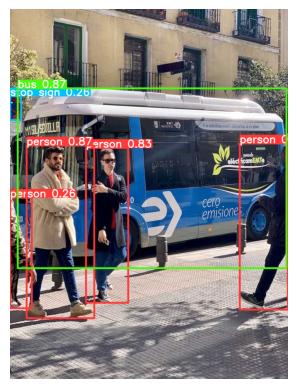

In [17]:
for r in results:
    annotated_img = r.plot()   # returns an annotated numpy array (BGR)
    
    # Save the annotated image
    cv2.imwrite("output.jpg", annotated_img)

    # Show inline (Jupyter / Colab)
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [20]:
# Step 5: Print detected objects
for r in results:
    for box, cls, conf in zip(r.boxes.xyxy, r.boxes.cls, r.boxes.conf):
        print(f"Detected {model.names[int(cls)]} with confidence {conf:.2f}")

Detected person with confidence 0.91
Detected bed with confidence 0.29


In [19]:
# Step 6: (Optional) Run on webcam
cap = cv2.VideoCapture(0)  # open webcam
while True:
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)
    annotated_frame = results[0].plot()
    cv2.imshow("YOLOv8 Webcam Detection", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 person, 106.4ms
Speed: 3.0ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1 cat, 97.4ms
Speed: 4.1ms preprocess, 97.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 1 bottle, 98.9ms
Speed: 2.6ms preprocess, 98.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 95.0ms
Speed: 2.5ms preprocess, 95.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 94.6ms
Speed: 3.5ms preprocess, 94.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 96.8ms
Speed: 2.0ms preprocess, 96.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 89.6ms
Speed: 1.0ms preprocess, 89.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 91.8ms
Speed: 2.0ms preprocess, 91.8ms inference, 1.0ms postprocess per imag